In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
zip_path = '/content/drive/MyDrive/Datasets/brain-tumor/brain-tumor-dataset.zip'
import zipfile
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/brain-tumor-dataset')

In [3]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
X_train = []
Y_train = []
image_size = 224
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/content/brain-tumor-dataset/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/brain-tumor-dataset/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [6]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 224, 224, 3)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [8]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [9]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 110, 110, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      36928     
                                                        

In [11]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [12]:
history = model.fit(X_train,y_train,epochs=30,validation_split=0.1)

Epoch 1/30
83/83 [==============================] - 45s 322ms/step - loss: 1.8558 - accuracy: 0.4071 - val_loss: 1.0878 - val_accuracy: 0.5340
Epoch 2/30
83/83 [==============================] - 19s 231ms/step - loss: 0.9834 - accuracy: 0.5815 - val_loss: 1.0692 - val_accuracy: 0.5204
Epoch 3/30
83/83 [==============================] - 19s 229ms/step - loss: 0.7963 - accuracy: 0.6614 - val_loss: 0.8285 - val_accuracy: 0.6224
Epoch 4/30
83/83 [==============================] - 19s 231ms/step - loss: 0.6558 - accuracy: 0.7321 - val_loss: 0.6286 - val_accuracy: 0.7347
Epoch 5/30
83/83 [==============================] - 20s 236ms/step - loss: 0.5767 - accuracy: 0.7802 - val_loss: 0.6186 - val_accuracy: 0.7211
Epoch 6/30
83/83 [==============================] - 20s 237ms/step - loss: 0.4556 - accuracy: 0.8207 - val_loss: 0.5801 - val_accuracy: 0.7449
Epoch 7/30
83/83 [==============================] - 20s 242ms/step - loss: 0.3923 - accuracy: 0.8494 - val_loss: 0.4847 - val_accuracy: 0.8129

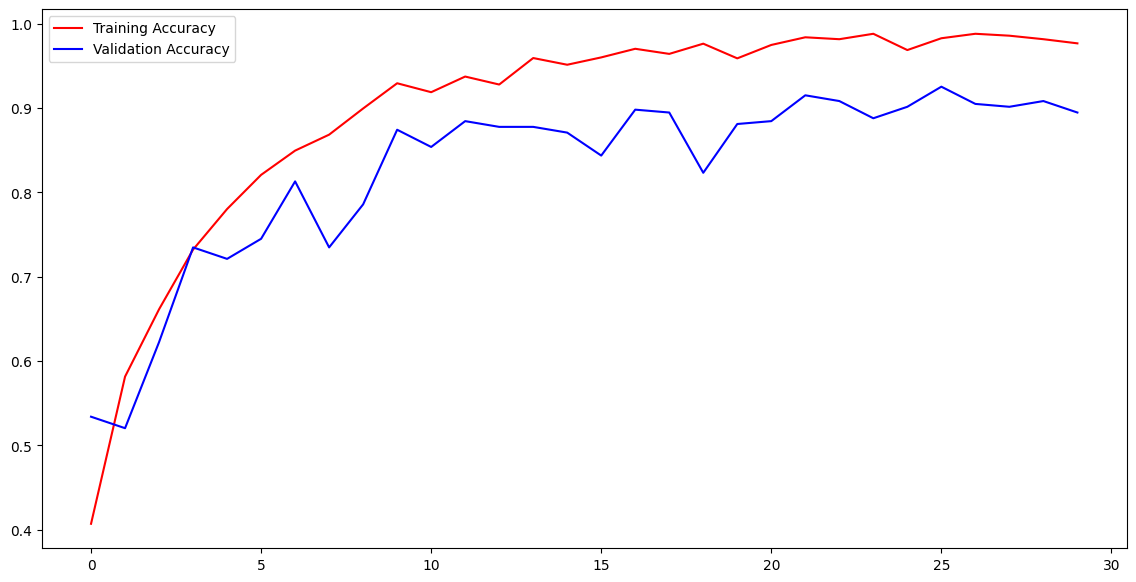

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

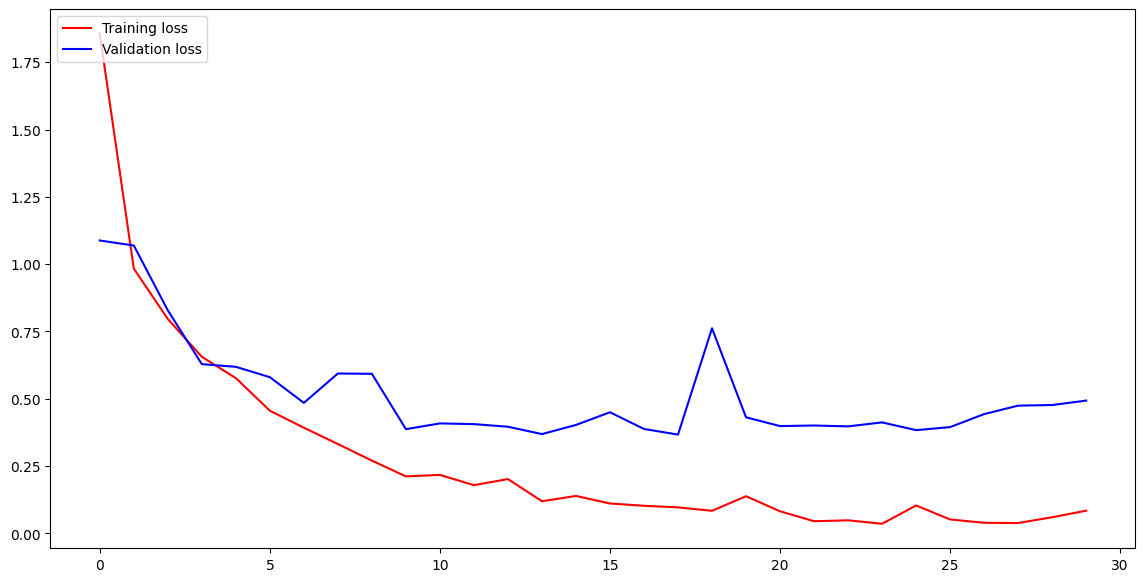

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

92/92 [==============================] - 4s 43ms/step


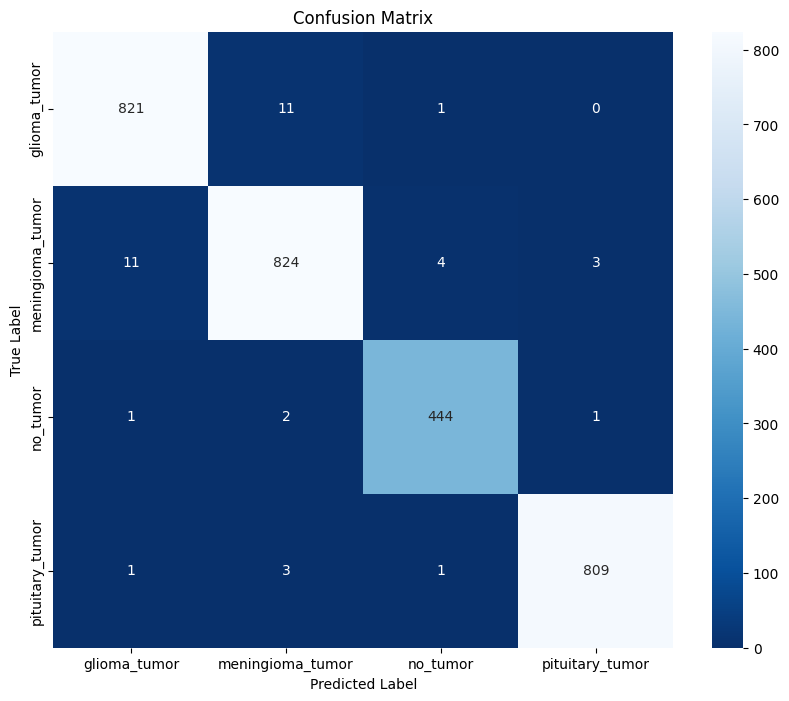

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

y_true = np.argmax(y_train, axis=1)
y_pred = np.argmax(model.predict(X_train), axis=1)

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(confusion_matrix(y_true,y_pred), annot=True, fmt='d', cmap='Blues_r',
                      xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

11/11 [==============================] - 2s 240ms/step


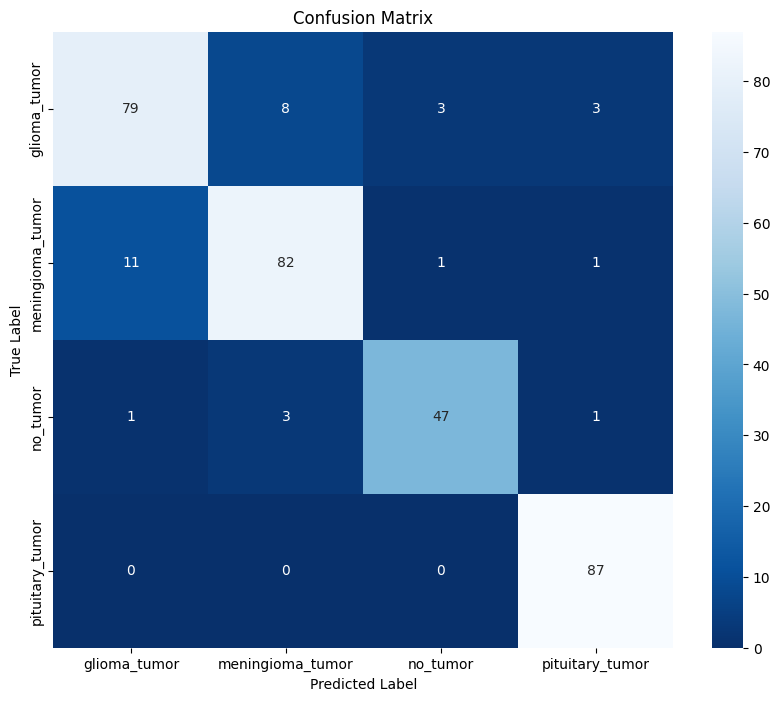

In [17]:
y_true_test = np.argmax(y_test, axis=1)
y_pred_test = np.argmax(model.predict(X_test), axis=1)

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(confusion_matrix(y_true_test,y_pred_test), annot=True, fmt='d', cmap='Blues_r',
                      xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [18]:

print(classification_report(y_true_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        93
           1       0.88      0.86      0.87        95
           2       0.92      0.90      0.91        52
           3       0.95      1.00      0.97        87

    accuracy                           0.90       327
   macro avg       0.90      0.90      0.90       327
weighted avg       0.90      0.90      0.90       327



In [29]:
img = cv2.imread('/content/brain-tumor-dataset/Testing/meningioma_tumor/image(48).jpg')
img = cv2.resize(img,(224,224))
img_array = np.array(img)
img_array.shape

(224, 224, 3)

In [30]:
img_array = img_array.reshape(1,224,224,3)
img_array.shape

(1, 224, 224, 3)

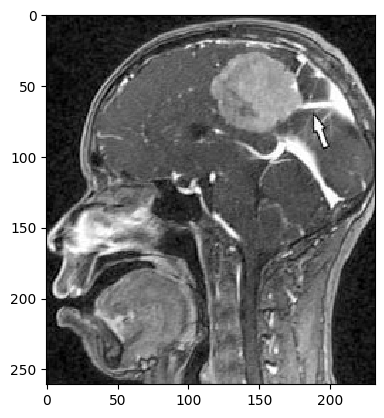

In [31]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/brain-tumor-dataset/Testing/meningioma_tumor/image(48).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [32]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 31ms/step


1

In [33]:
model.save('BrainTumorCNN.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
